In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
wkly_close_etf=pd.read_csv('Resources/WKLY_ETF_close_prices.csv',index_col = "date", infer_datetime_format = True, parse_dates = True).sort_index(ascending=True)
wkly_close_etf

,SPY wkly close,QQQ wkly close,DIA wkly close,VNQ wkly close,BITO wkly close
date,,,,,
2013-09-30,168.89,79.40,150.43,65.90,NaN
2013-10-07,170.26,79.23,152.17,67.83,NaN
2013-10-14,174.39,82.15,153.60,69.86,NaN
2013-10-21,175.95,82.90,155.45,71.05,NaN
2013-10-28,176.21,82.81,155.86,69.49,NaN
...,...,...,...,...,...
2023-09-04,445.52,372.58,346.51,81.58,13.33
2023-09-11,443.37,370.81,346.14,81.81,13.57
2023-09-18,430.42,357.91,339.58,77.44,13.62


In [3]:
#find null valuse
wkly_close_etf.isnull().sum()

SPY wkly close       0
QQQ wkly close       0
DIA wkly close       0
VNQ wkly close       0
BITO wkly close    420
dtype: int64

In [4]:
#find volatility
wkly_pct_change=wkly_close_etf.pct_change()
wkly_pct_change

,SPY wkly close,QQQ wkly close,DIA wkly close,VNQ wkly close,BITO wkly close
date,,,,,
2013-09-30,NaN,NaN,NaN,NaN,NaN
2013-10-07,0.008112,-0.002141,0.011567,0.029287,NaN
2013-10-14,0.024257,0.036855,0.009397,0.029928,NaN
2013-10-21,0.008945,0.009130,0.012044,0.017034,NaN
2013-10-28,0.001478,-0.001086,0.002638,-0.021956,NaN
...,...,...,...,...,...
2023-09-04,-0.012567,-0.013268,-0.007078,-0.011391,0.012149
2023-09-11,-0.004826,-0.004751,-0.001068,0.002819,0.018005
2023-09-18,-0.029208,-0.034789,-0.018952,-0.053416,0.003685


In [5]:
#drop null valuse
wkly_pct_change=wkly_pct_change.dropna()
wkly_pct_change

,SPY wkly close,QQQ wkly close,DIA wkly close,VNQ wkly close,BITO wkly close
date,,,,,
2021-10-25,0.013528,0.032104,0.004177,0.000000,0.022273
2021-11-01,0.020207,0.032348,0.014153,0.008621,-0.027977
2021-11-08,-0.002689,-0.009784,-0.005560,-0.002819,0.047376
2021-11-15,0.003467,0.023537,-0.014864,-0.002280,-0.099951
2021-11-22,-0.021156,-0.031659,-0.019359,-0.012978,-0.069441
...,...,...,...,...,...
2023-09-04,-0.012567,-0.013268,-0.007078,-0.011391,0.012149
2023-09-11,-0.004826,-0.004751,-0.001068,0.002819,0.018005
2023-09-18,-0.029208,-0.034789,-0.018952,-0.053416,0.003685


<Axes: xlabel='date'>

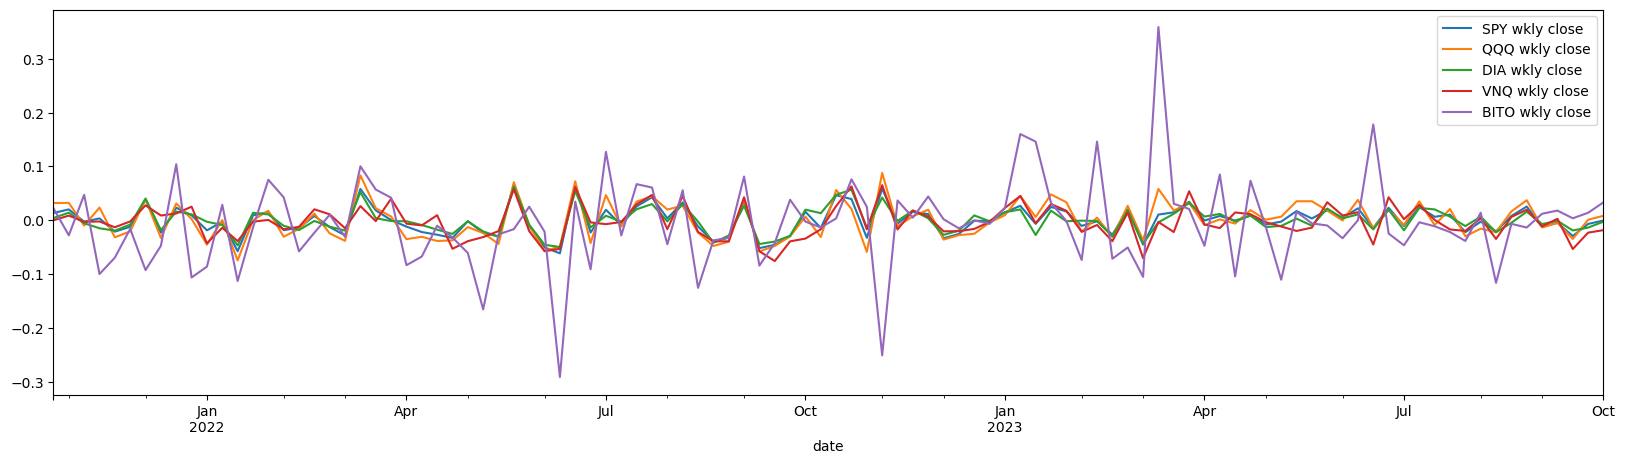

In [6]:
wkly_pct_change.plot(figsize=(20,5))

<Axes: xlabel='date'>

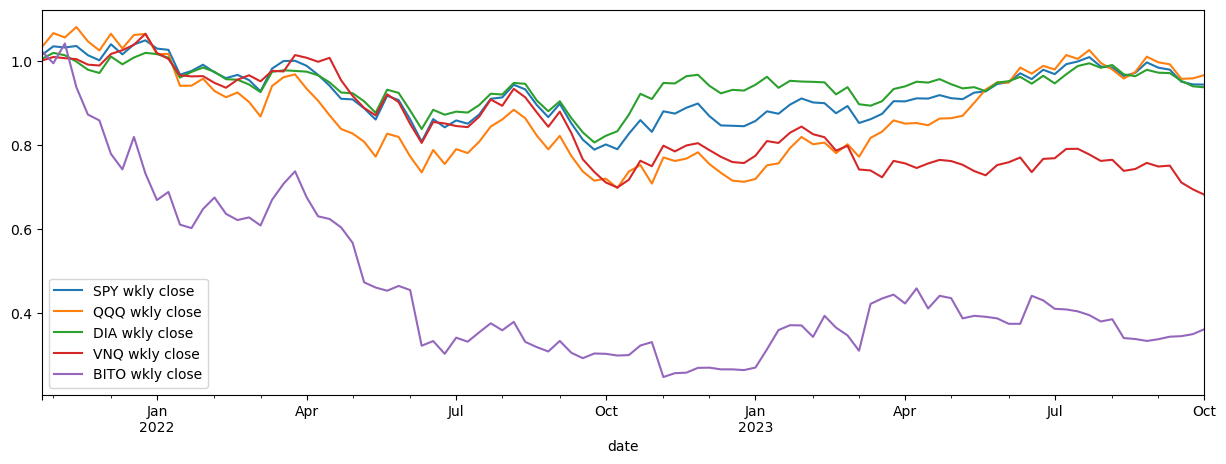

In [7]:
cumulative_returns=(1+wkly_pct_change).cumprod()
cumulative_returns.plot(figsize=(15,5))

<Axes: >

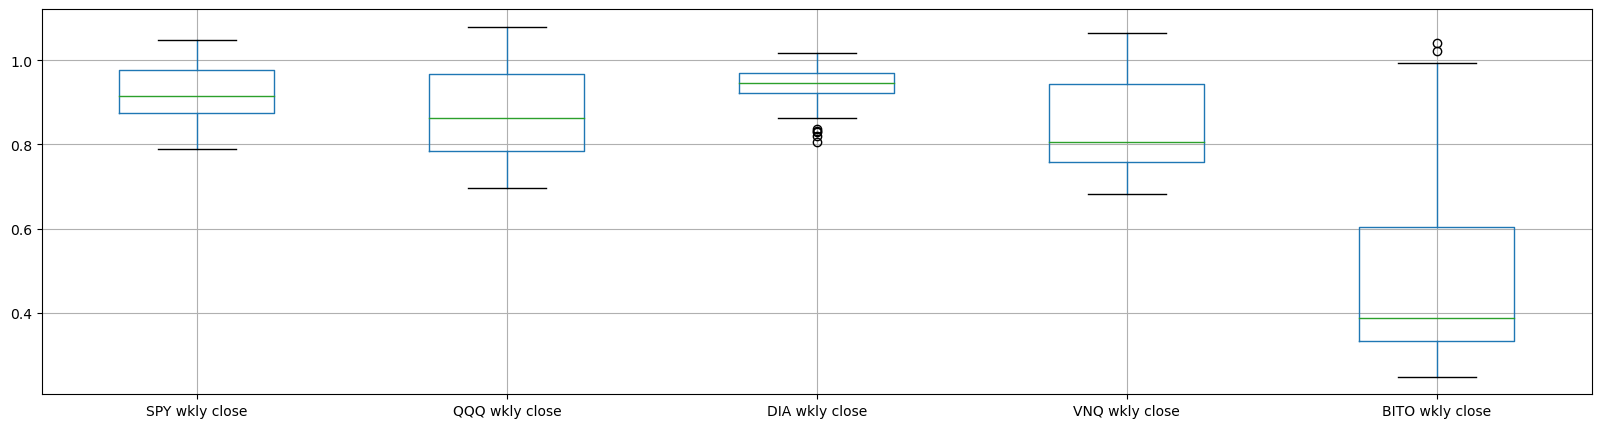

In [8]:
risk_plot=cumulative_returns
risk_plot.boxplot(figsize=(20,5))

In [9]:
# Set weights for even portfolio distrubition
weights = [.2,.2,.2,.2,.2]
portfolio_returns = wkly_pct_change.dot(weights)
portfolio_returns.head()

date
2021-10-25    0.014416
2021-11-01    0.009470
2021-11-08    0.005305
2021-11-15   -0.018018
2021-11-22   -0.030919
dtype: float64

In [10]:
cumulative_returns = (1 + portfolio_returns).cumprod()
cumulative_returns.head()

date
2021-10-25    1.014416
2021-11-01    1.024023
2021-11-08    1.029455
2021-11-15    1.010907
2021-11-22    0.979651
dtype: float64

<Axes: xlabel='date'>

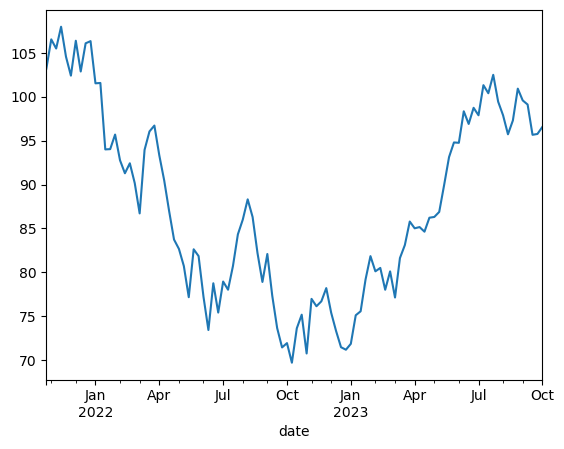

In [46]:
# Plot the returns of the portfolio with initial investment of $100
initial_investment = 100
cumulative_profit = initial_investment * cumulative_returns
cumulative_profit.plot()

<Axes: xlabel='date'>

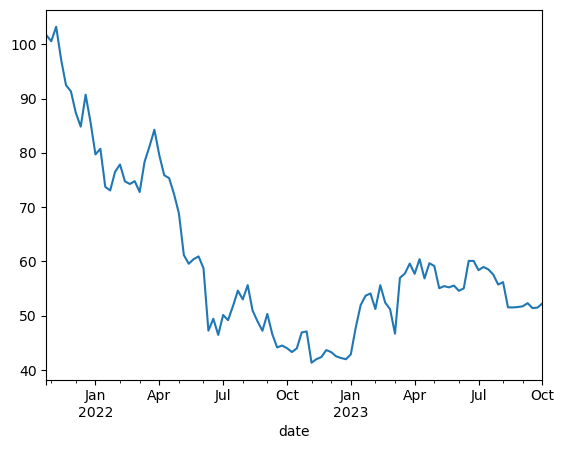

In [47]:
# Change weights for more risker profile of etf, weighted heavly towards BITO, VNQ, and QQQ
weights = [0,.1,0,.3,.6]
portfolio_returns = wkly_pct_change.dot(weights)

cumulative_returns = (1 + portfolio_returns).cumprod()

initial_investment = 100
high_risk_portfolio = initial_investment * cumulative_returns
high_risk_portfolio.plot()

<Axes: xlabel='date'>

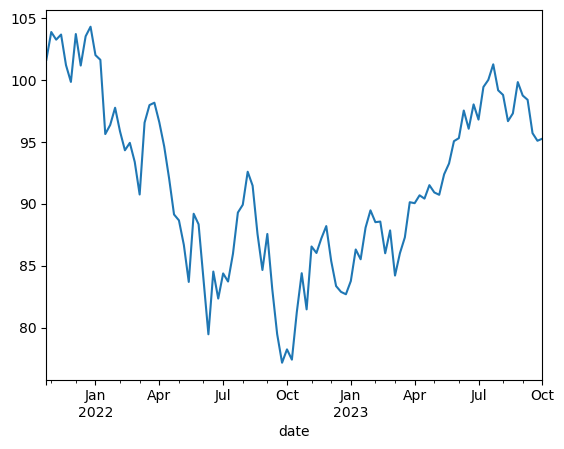

In [48]:
# Change weights for less risker profile of etf, weighted heavly towards SPY, QQQ, DIA
weights = [.33,.33,.33,0,0]
portfolio_returns = wkly_pct_change.dot(weights)

cumulative_returns = (1 + portfolio_returns).cumprod()

initial_investment = 100
low_risk_portfolio = initial_investment * cumulative_returns
low_risk_portfolio.plot()

In [14]:
correlation=wkly_pct_change.corr()
correlation

,SPY wkly close,QQQ wkly close,DIA wkly close,VNQ wkly close,BITO wkly close
SPY wkly close,1.000000,0.939105,0.944267,0.834985,0.331540
QQQ wkly close,0.939105,1.000000,0.805961,0.738702,0.368929
DIA wkly close,0.944267,0.805961,1.000000,0.815099,0.270568
VNQ wkly close,0.834985,0.738702,0.815099,1.000000,0.226750
BITO wkly close,0.331540,0.368929,0.270568,0.226750,1.000000


In [15]:
import seaborn as sns

<Axes: >

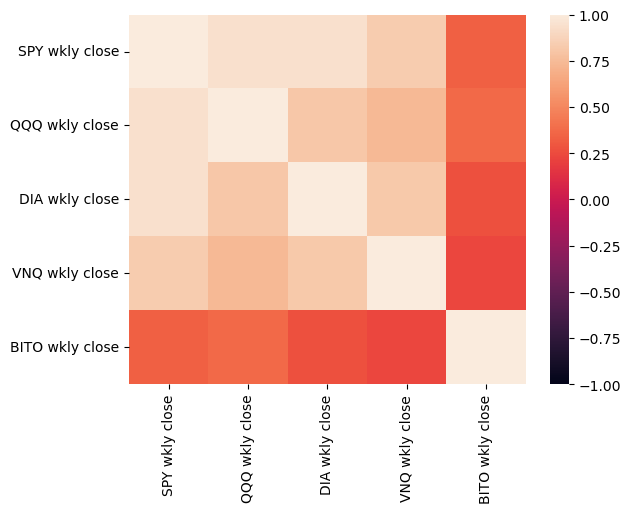

In [16]:
sns.heatmap(correlation, vmin=-1, vmax=1)

<Axes: xlabel='date'>

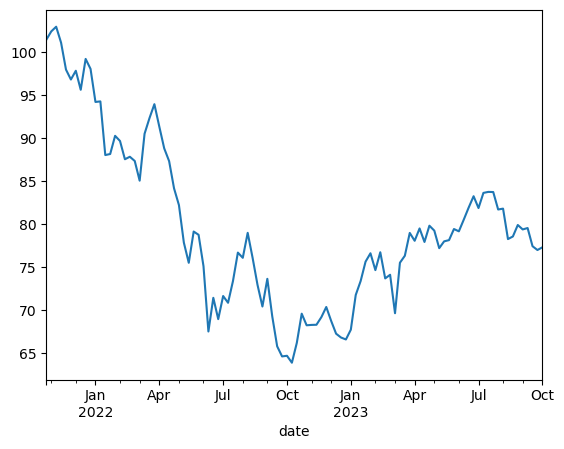

In [49]:
# Equally weighted portfolio 
weights = [.2,.2,.2,.2,.2]
portfolio_returns= wkly_pct_change.dot(weights)

cumulative_returns = (1 + portfolio_returns).cumprod()

initial_investment = 100
equal_distrubition_portfolio = initial_investment * cumulative_returns
equal_distrubition_portfolio.plot()

<Axes: xlabel='date'>

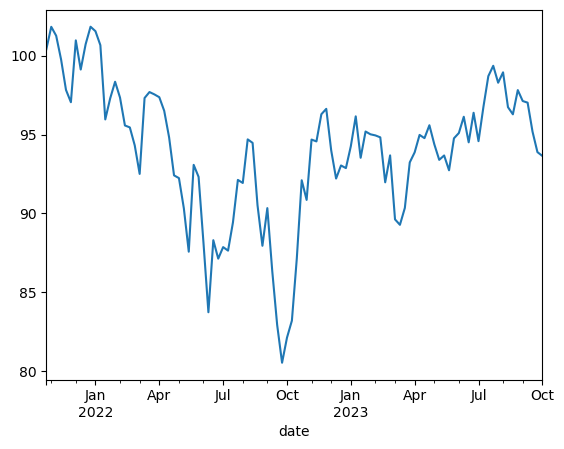

In [50]:
# DIA least volatile
weights = [0,0,1,0,0]
portfolio_returns= wkly_pct_change.dot(weights)

cumulative_returns = (1 + portfolio_returns).cumprod()

initial_investment = 100
dia = initial_investment * cumulative_returns
dia.plot()

<Axes: xlabel='date'>

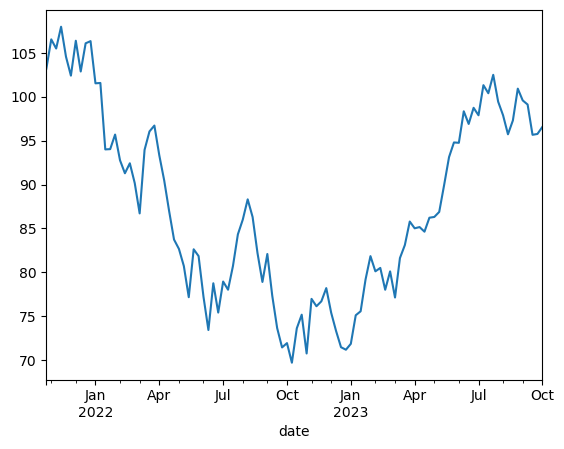

In [51]:
# QQQ 
weights = [0,1,0,0,0]
portfolio_returns= wkly_pct_change.dot(weights)

cumulative_returns = (1 + portfolio_returns).cumprod()

initial_investment = 100
qqq = initial_investment * cumulative_returns
qqq.plot()

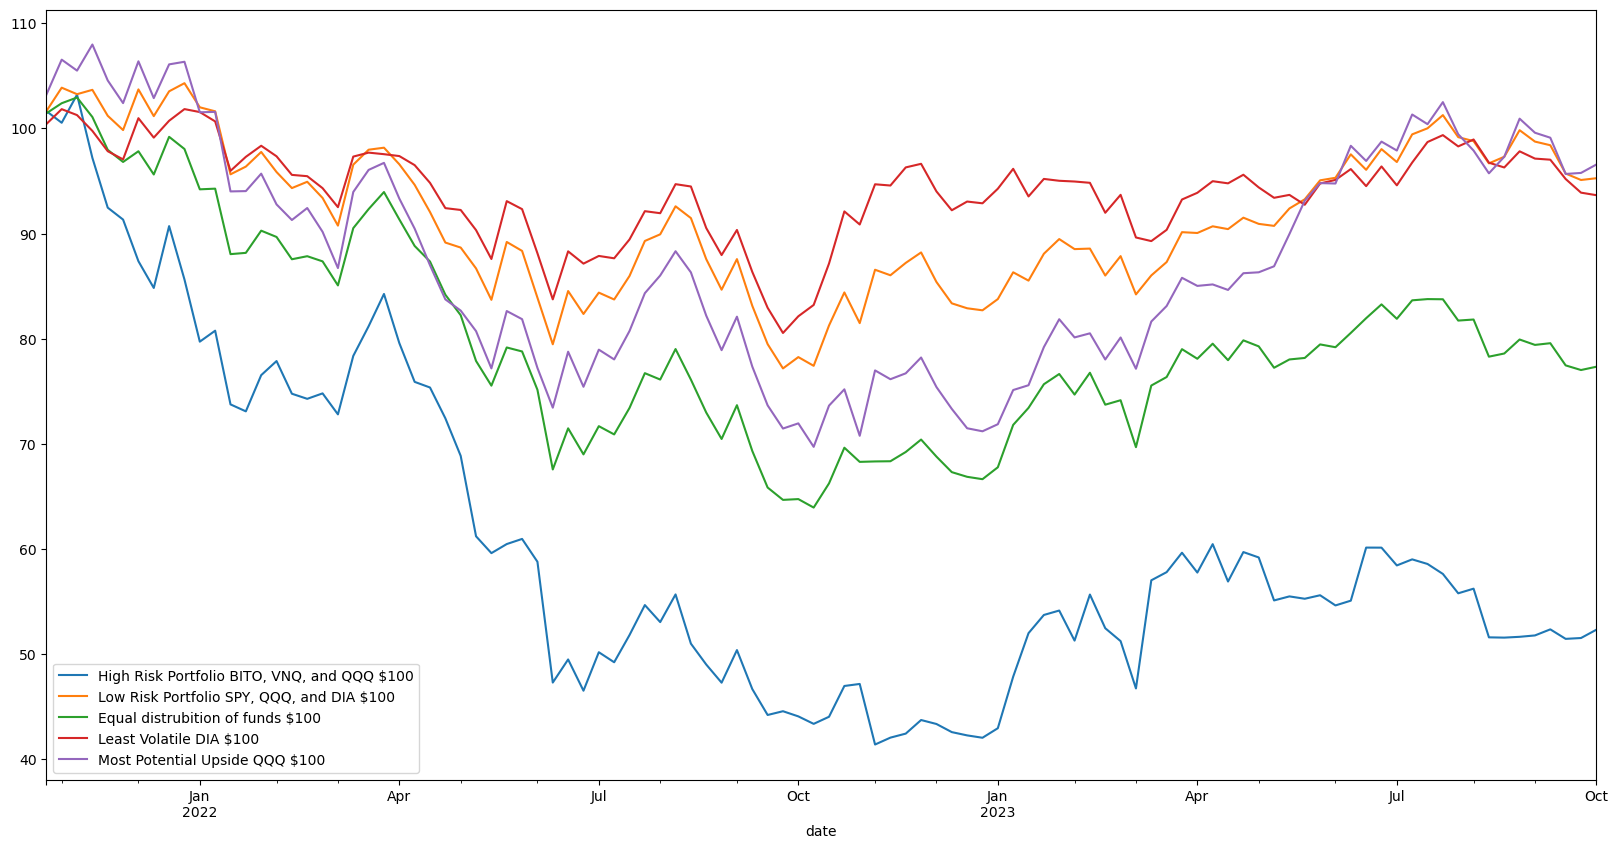

In [52]:
ax = high_risk_portfolio.plot(figsize=(20,10))
low_risk_portfolio.plot(ax=ax)
equal_distrubition_portfolio.plot(ax=ax)
dia.plot(ax=ax)
qqq.plot(ax=ax)

ax.legend(['High Risk Portfolio BITO, VNQ, and QQQ $100', 
           'Low Risk Portfolio SPY, QQQ, and DIA $100', 
           'Equal distrubition of funds $100',
           'Least Volatile DIA $100',
           'Most Potential Upside QQQ $100'])